# Упражнение 06 : Матрица рассеяния

In [1]:
import pandas as pd
import sqlite3
con = sqlite3.connect('../data/checking-logs.sqlite')

* создайте таблицу, в которой для каждого пользователя из тестовой группы будет указана средняя разница, количество просмотров страниц и количество коммитов
* не учитывайте проект 1 при расчёте средней разницы и количества коммитов
* возьмите количество коммитов из таблицы проверки
* размер рисунка остался прежним, вы можете выбрать любой размер шрифта, а также цветовую палитру
* размер точек должен быть 200
* ширина линий на диагональных графиках (kde) должна быть 3

In [2]:
sql = '''
SELECT uid, COUNT(*) AS commits_count
FROM checker
WHERE uid LIKE 'user_%'
AND labname != 'project1'
GROUP BY uid
'''
commits = pd.read_sql(sql, con)
commits.head()

,uid,commits_count
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86


In [3]:
sql = '''
SELECT uid, COUNT(*) AS views_count
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY uid
'''
views = pd.read_sql(sql, con)
views.head()

,uid,views_count
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3


In [4]:
sql = '''
SELECT uid,
    ((strftime('%s', timestamp) - deadlines.deadlines) / 3600) AS avg_diff
FROM checker
LEFT JOIN deadlines
ON checker.labname=deadlines.labs
WHERE labname != 'project1'
AND uid LIKE 'user_%'
AND numTrials == 1
'''
avg_diff = pd.read_sql(sql, con)
avg_diff = avg_diff[avg_diff['avg_diff'].notnull()]
avg_diff

,uid,avg_diff
0,user_4,-228.0
1,user_4,-228.0
2,user_30,-202.0
3,user_2,-202.0
4,user_2,-202.0
...,...,...
125,user_23,-87.0
126,user_19,-82.0
127,user_23,-81.0
128,user_17,-80.0


In [5]:
avg_diff = avg_diff.groupby('uid').mean()
avg_diff

,avg_diff
uid,
user_1,-64.400000
user_10,-74.800000
user_11,-2.000000
user_12,-89.000000
user_13,-48.500000
user_14,-159.000000
user_15,-17.500000
user_16,-39.333333
user_17,-61.600000


In [6]:
df = pd.merge(left=views, right=commits, on=['uid'], how='inner')
df = pd.merge(left=df, right=avg_diff, on=['uid'], how='inner')
df.drop(columns = ['uid'], inplace=True)
df

,views_count,commits_count,avg_diff
0,28,62,-64.400000
1,89,20,-74.800000
2,143,61,-159.000000
3,47,51,-61.600000
4,3,5,-5.666667
5,16,118,-98.750000
6,10,65,-95.500000
7,179,79,-92.600000
8,149,60,-86.400000
9,317,18,-105.400000


array([[<Axes: xlabel='views_count', ylabel='views_count'>,
        <Axes: xlabel='commits_count', ylabel='views_count'>,
        <Axes: xlabel='avg_diff', ylabel='views_count'>],
       [<Axes: xlabel='views_count', ylabel='commits_count'>,
        <Axes: xlabel='commits_count', ylabel='commits_count'>,
        <Axes: xlabel='avg_diff', ylabel='commits_count'>],
       [<Axes: xlabel='views_count', ylabel='avg_diff'>,
        <Axes: xlabel='commits_count', ylabel='avg_diff'>,
        <Axes: xlabel='avg_diff', ylabel='avg_diff'>]], dtype=object)

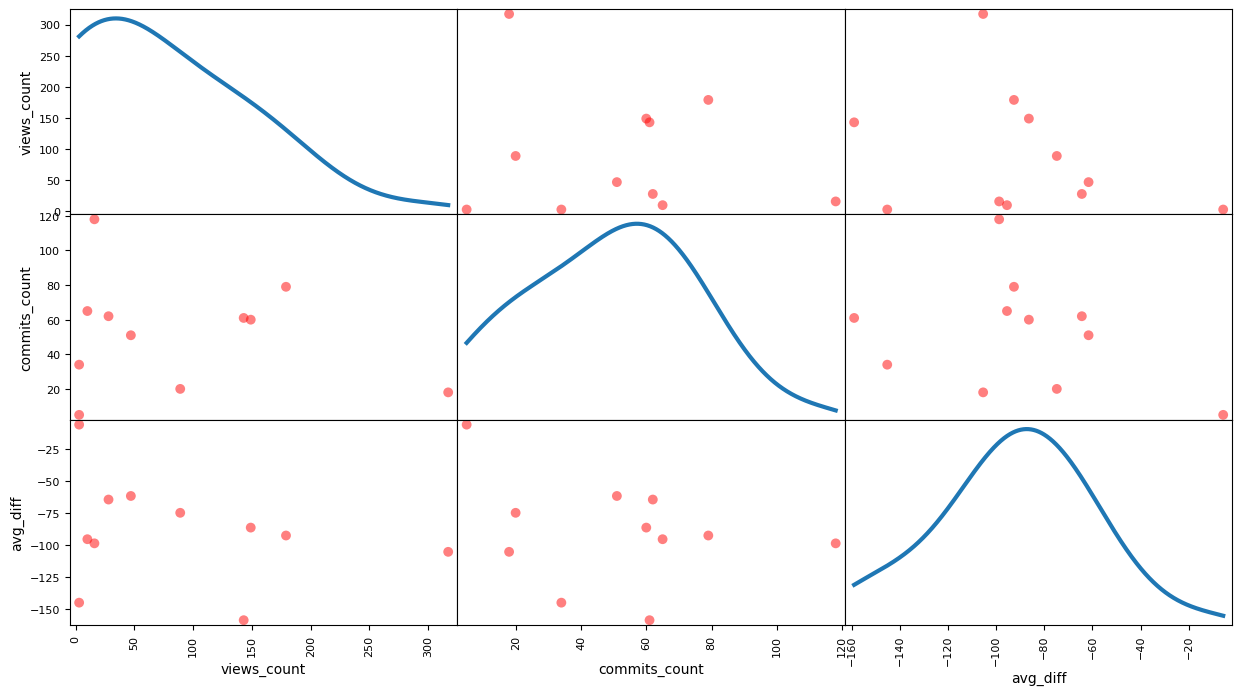

In [7]:
pd.plotting.scatter_matrix(df, figsize=(15, 8), diagonal='kde', density_kwds=dict(linewidth=3), s=200, color='red')

In [8]:
con.close()

# в конце блокнота Jupyter создайте ячейку с кодом и вставьте вопросы:

* «Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него мало коммитов?» Ответ: да или нет.

Нет

* «Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него небольшая средняя разница между первым коммитом и крайним сроком выполнения лабораторной работы?» Ответ: да или нет.

Нет

* «Можно ли сказать, что есть много пользователей с небольшим количеством коммитов и несколько пользователей с большим количеством коммитов»? Ответ: да или нет.

Нет

* «Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько пользователей с большой средней разницей»? Ответ: да или нет.

Нет